## Califarnia Housing Price predict

## Data Preparation


In [ ]:
# Import necessary libraries
# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Hide convergence warning for now
import warnings
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
#import the scikit-learn library and corresponding packages needed for feature scaling
#and the different classifications steps and evaluation metrics of your models

In [ ]:
!pip install opendatasets
import opendatasets as od
import os

#load the dataset
price_dataset = 'https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features'
od.download(price_dataset)

data_dir = './california-housing-prices-data-extra-features'
os.listdir(data_dir)

Skipping, found downloaded files in ".\california-housing-prices-data-extra-features" (use force=True to force download)


['California_Houses.csv']

## Data Visualization


In [ ]:
# Use the path to load the file
df = pd.read_csv('./california-housing-prices-data-extra-features/California_Houses.csv')

# Display the first few rows to verify
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

**Data Quality Check**
   - **Missing Data**: Datasets often have missing values, especially when they are collected from different sources.
   - **Outliers**: Some features, may have extreme values (outliers) that could skew results and affect predictive modeling.

In [ ]:
# Check for missing values
df.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

We do not have missing data. The dataset quality is GOOD.

**We can plot some key variables to see their distribution characteristics.**

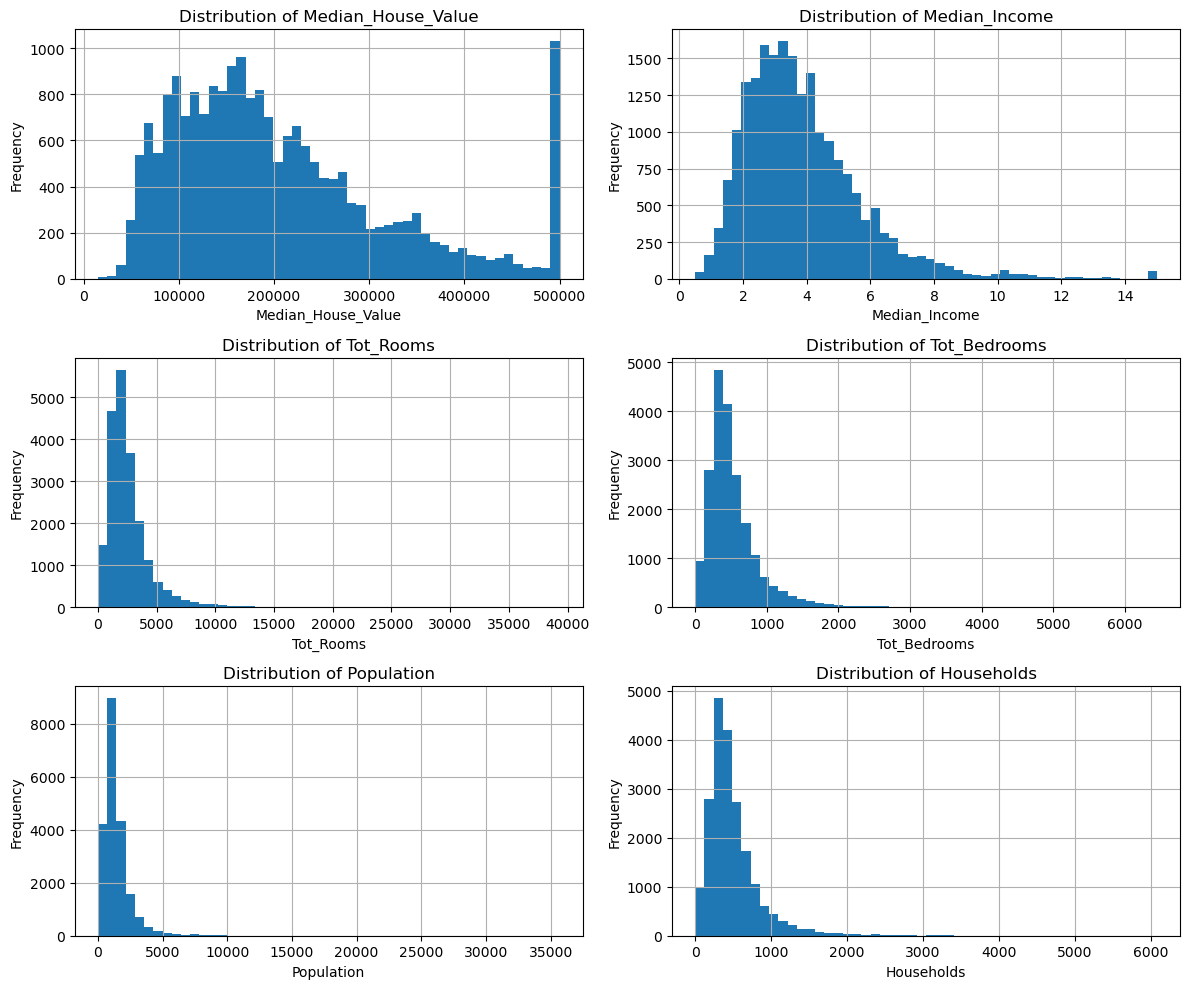

In [ ]:
# pick some important features
columns_to_plot = ['Median_House_Value', 'Median_Income', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households']

# Create a figure for subplots
plt.figure(figsize=(12, 10))

# Loop through the columns and create histograms
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)  # Create a 3x2 grid for subplots
    df[col].hist(bins=50)  # Adjust bins as needed
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

The histograms provide valuable insights into the distributions of your key variables :

### 1. **Median_House_Value**:
   - The distribution is **right-skewed**, with a significant number of homes at the upper limit of $500,000. This indicates a **capping** effect in the dataset, meaning house prices above this limit were likely capped, and it may need special consideration during regression modeling. Additionally, there are several peaks, indicating variability across different price ranges.
   
   **Explanation**: "The `Median_House_Value` is right-skewed, and a capping effect is observed at the upper limit of $500,000, suggesting a potential constraint in the data. The variability in house prices, represented by the peaks, may indicate different housing segments."

### 2. **Median_Income**:
   - The distribution is also **right-skewed**, with most of the income values concentrated between 0 and 8, and very few above 10. This long tail indicates that higher incomes are relatively rare in the dataset.

   **Explanation**: "The `Median_Income` shows a right-skewed distribution, with most households earning between 0 and 8. Higher income values (above 10) are relatively rare, contributing to a long tail in the distribution."

### 3. **Tot_Rooms**:
   - This distribution is **highly skewed to the right**, with a significant concentration of homes having fewer than 5,000 total rooms. A few homes have exceptionally high room counts (up to 40,000), likely representing larger estates or properties.

   **Explanation**: "The `Tot_Rooms` distribution is heavily right-skewed, with most homes having fewer than 5,000 rooms. A few outliers exist, with properties having up to 40,000 rooms, likely representing larger estates."

### 4. **Tot_Bedrooms**:
   - Similar to `Tot_Rooms`, this distribution is also **right-skewed**, with most homes having fewer than 2,000 total bedrooms, though some properties have a very high number of bedrooms, which could be considered outliers.

   **Explanation**: "The `Tot_Bedrooms` distribution is right-skewed, with most homes having fewer than 2,000 bedrooms. However, a few homes have an exceptionally high number of bedrooms, possibly representing large estates."

### 5. **Population**:
   - The **population distribution** is again **right-skewed**, with most of the areas having fewer than 5,000 people. However, some areas have much higher populations, with a maximum of over 30,000, which could represent larger metropolitan areas.

   **Explanation**: "The `Population` variable shows a right-skewed distribution, with most areas having populations under 5,000. There are some areas with much larger populations, which might represent highly urbanized regions."

### 6. **Households**:
   - The distribution of households is **similar** to the total rooms and bedrooms, with a majority of homes having fewer than 2,000 households. There are a few outliers with significantly more households, which might indicate larger residential areas or multifamily units.

   **Explanation**: "The `Households` variable displays a right-skewed distribution, with most homes containing fewer than 2,000 households. A few homes have a much higher number of households, likely reflecting larger residential buildings or units."

---

### General Observations:
- **Right-skewed distributions**: All of these variables are right-skewed, meaning there are a few very large values that could influence the results of your regression analysis.
- **Outliers**: Some of these variables have extreme values (such as `Tot_Rooms`, `Tot_Bedrooms`, and `Population`), and these outliers should be considered during modeling.
- **Multicollinearity check**: It will be helpful to look for correlations between these variables to ensure that multicollinearity does not negatively impact the regression analysis.

In [ ]:
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


Based on the `describe()` output, here are some potential insights that could point to unusual data or outliers:

### 1. **Median_House_Value**:
   - The **maximum value** is capped at 500,001.0, which could indicate the presence of a cap in the dataset. This suggests that the actual maximum values of some homes may be higher, but they are limited in the dataset. This could affect the performance of predictive models.
   - The **min value** (14,999) seems quite low compared to the mean (206,855), so this could indicate potential outliers or extreme values.

### 2. **Total Rooms (Tot_Rooms)** and **Total Bedrooms (Tot_Bedrooms)**:
   - The **max value for Tot_Rooms** is 39,320, which seems abnormally high for a single house. Given that the 75th percentile is only 3,148, this could indicate extreme outliers or unusual cases.
   - Similarly, the **max value for Tot_Bedrooms** is 6,445, which is very high, indicating a possible outlier.

### 3. **Population**:
   - The **maximum population** is 35,682, which is far larger than the 75th percentile (1,725). This indicates the presence of outliers, where some areas have a significantly higher population than most.

### 4. **Households**:
   - The **maximum households** (6,082) also appears unusually high, as the 75th percentile is only 605. This suggests outliers in some areas with a high number of households.

### 5. **Distance Features**:
   - For **Distance_to_coast**, **Distance_to_LA**, and other distance features, the minimum values seem reasonable, but there is a very large range between the minimum and maximum values. For example, the **Distance_to_LA** has a min of 420.589 km and a max of 1,018,260 km, which suggests a wide variation in the data.

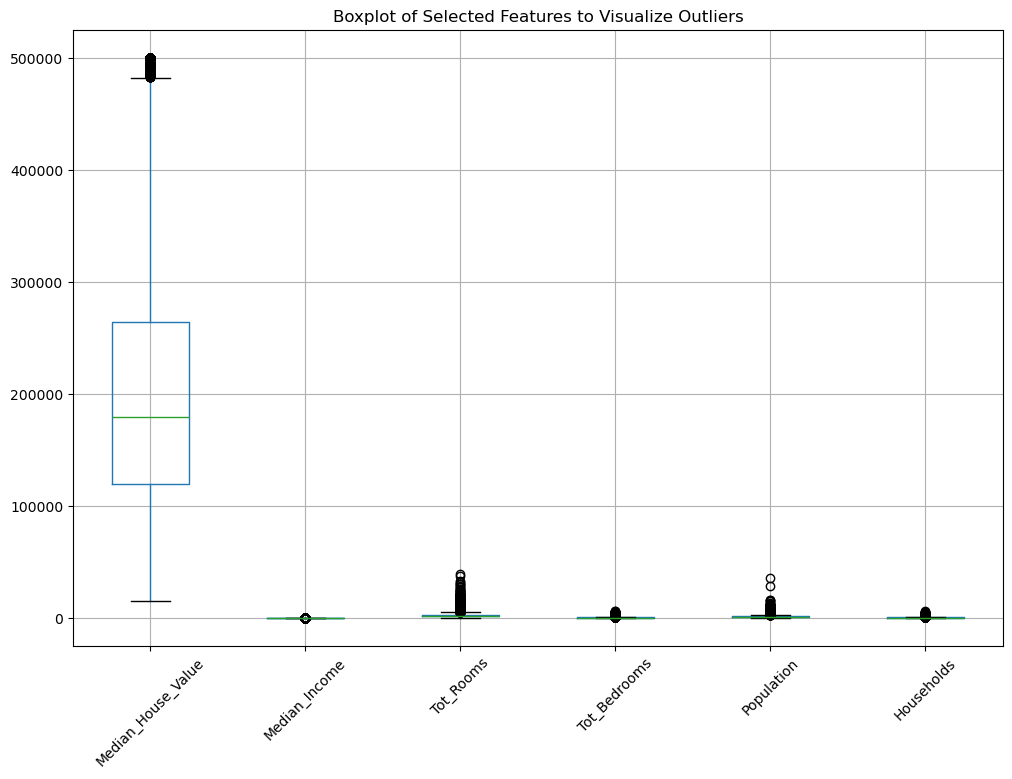

In [ ]:
# List of columns to visualize for outliers
columns_to_visualize = ['Median_House_Value', 'Median_Income', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households']

# Create boxplots for each selected column
plt.figure(figsize=(12, 8))

# Boxplot for the selected columns to visualize outliers
df[columns_to_visualize].boxplot()

# Customize plot
plt.xticks(rotation=45)
plt.title('Boxplot of Selected Features to Visualize Outliers')
plt.show()

From the boxplot， we can also observe potential **outliers**  as we concluded.

### we can do:
- **Investigate further**: we can check the specific rows of data corresponding to these outliers and decide whether to remove them, transform them (e.g., using log transformation), or keep them.
- **Feature scaling**: Since some features have very different scales (e.g., `Median_House_Value` is much larger than `Median_Income`), applying scaling (like Min-Max or Standardization) before modeling can help normalize the data.

To prevent **data leakage**， we need to split our test and train set from now. As our previous plots shows, we decided to cut the income by 20k to have a representative training set and them sampling. First we see the distributions to validate whether our hypothesis is feasible and then do the split.


<Axes: >

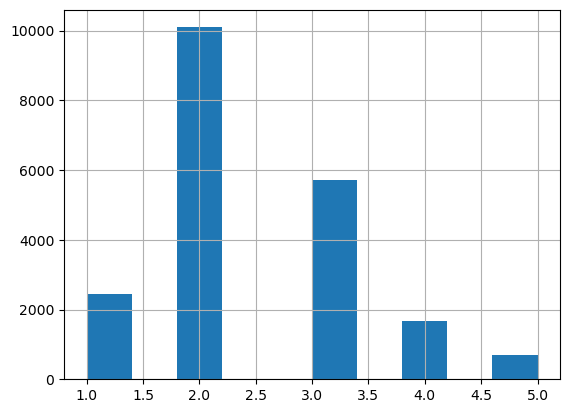

In [ ]:
#see distribution of income cut by 20k.
df["income_label"] = pd.cut(df["Median_Income"],
                               bins=[0., 2, 4, 6, 8., np.inf],
                               labels=[1, 2, 3, 4, 5])
df["income_label"].hist()

In [ ]:
#Split the dataset

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_label"]):
    house_train_set = df.loc[train_index]
    house_test_set = df.loc[test_index]
    #Delete the lable to make the dataframe clear
    house_train_set = house_train_set.drop(columns=["income_label"])
    house_test_set = house_test_set.drop(columns=["income_label"])

Capping is a good approach if the outliers are legitimate but extreme.This approach ensures that the outliers do not have a disproportionate effect on regression model, while still retaining most of the data.Because extreme values may not provide meaningful influence on our future house price estimates and can skew our prediction values.However, if we want to explore extreme scenarios, our data still exists.

In [ ]:
# List of columns to visualize and cap outliers for
columns_to_visualize = ['Median_House_Value', 'Median_Income', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households']

# After visualization, we saw some outliers, and we decided to cap them
# We need to deal with the train and test set in the same time so we used function
def cap_outliers(df, lower_bound=None, upper_bound=None, columns_to_visualize=None, train=True):
    df_capped = df.copy()

    # use the upper and lower bound from the train set and cap them
    if train:
        lower_bound = df[columns_to_visualize].quantile(0.01)
        upper_bound = df[columns_to_visualize].quantile(0.99)
    for col in columns_to_visualize:
        df_capped[col] = df_capped[col].clip(lower=lower_bound[col], upper=upper_bound[col])

    return df_capped, lower_bound, upper_bound

# Some variables we will have other algorithms so we select only below columns
columns_to_visualize = ['Median_House_Value', 'Median_Income', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households']

# Cap the train and test set
train_capped, lower_bound, upper_bound = cap_outliers(house_train_set, columns_to_visualize=columns_to_visualize, train=True)
test_capped, _, _ = cap_outliers(house_test_set, lower_bound=lower_bound, upper_bound=upper_bound, columns_to_visualize=columns_to_visualize, train=False)

# see the set
train_capped.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,1.651200e+04,1.651200e+04,16512.000000,16512.000000
mean,206934.132510,3.853680,28.568132,2598.198417,532.718113,1408.552297,494.255656,35.634637,-119.571391,40612.206762,2.698488e+05,3.985019e+05,348612.954608,386095.081964
std,115212.340362,1.803776,12.584525,1852.728784,373.523485,975.821593,337.788733,2.134671,2.003399,49422.236089,2.474205e+05,2.892805e+05,217488.642792,250441.097380
min,50211.000000,1.062500,1.000000,172.110000,38.000000,89.220000,32.000000,32.540000,-124.350000,120.676447,6.328221e+02,4.849180e+02,569.448118,456.141313
25%,120000.000000,2.567850,18.000000,1450.000000,296.000000,788.000000,280.000000,33.930000,-121.800000,9124.067300,3.235901e+04,1.594772e+05,111901.849238,116146.651331
50%,179550.000000,3.541700,29.000000,2134.500000,436.000000,1170.500000,410.000000,34.260000,-118.500000,20439.365846,1.743272e+05,2.156694e+05,459417.946059,526179.726025
75%,264700.000000,4.744075,37.000000,3168.000000,653.000000,1732.000000,608.000000,37.710000,-118.000000,49915.351410,5.268261e+05,7.057677e+05,516948.868004,584552.007907
max,500001.000000,10.634053,52.000000,11016.000000,2209.780000,5775.500000,1965.900000,41.950000,-114.470000,333804.686371,1.016331e+06,1.195038e+06,836762.678210,903627.663298


**To prevent multicollinearity**

Since we are planning to do regression analysis, it's important to check for multicollinearity between variables. A pair plot and correlation heatmap can help us visualize relationships between variables and detect any strong correlations that could lead to multicollinearity in regression model.

In [ ]:
# Create a pair plot to see pairwise relationships
sns.pairplot(train_capped)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

The pair plot provides a useful visual overview of the relationships between all pairs of variables in your dataset, allowing us to observe potential correlations and multicollinearity.

### Key Observations from the Pair Plot:

1. **no sign of Strong Linear Relationships**:
   - From the scatter plots, it seems that **none of the variables** exhibit a strong linear relationship with each other. We can see that the scatter plots are relatively diffuse, with no clear patterns or straight lines that indicate a perfect correlation.
   - For example, `Median_Income` and `Median_House_Value` do have some upward trends (which makes sense intuitively), but the scatter is still quite spread out, indicating only a moderate relationship rather than a strong one.

2. **Potential Weak Relationships**:
   - Some variables, like `Tot_Rooms` vs. `Tot_Bedrooms`, show slightly more structured relationships, which is expected because more rooms generally mean more bedrooms. However, this relationship is still not strong enough to suggest significant multicollinearity.

### Conclusion:
- **Multicollinearity** does **not appear to be a major issue** based on the pair plot. The scatter plots between most variables do not show strong correlations, which means we are less likely to run into problems of multicollinearity in your regression model.
- **Moderate Correlations**: Variables like `Median_Income` and `Median_House_Value` show a moderate positive relationship, which aligns with expectations for house prices and income. However, this relationship is not extreme enough to indicate multicollinearity.
  
### Next Steps:
To confirm these findings, we could generate a **correlation matrix** (or correlation heatmap) to quantitatively assess the strength of the relationships between variables. This would give us more precise numerical values for the correlations.

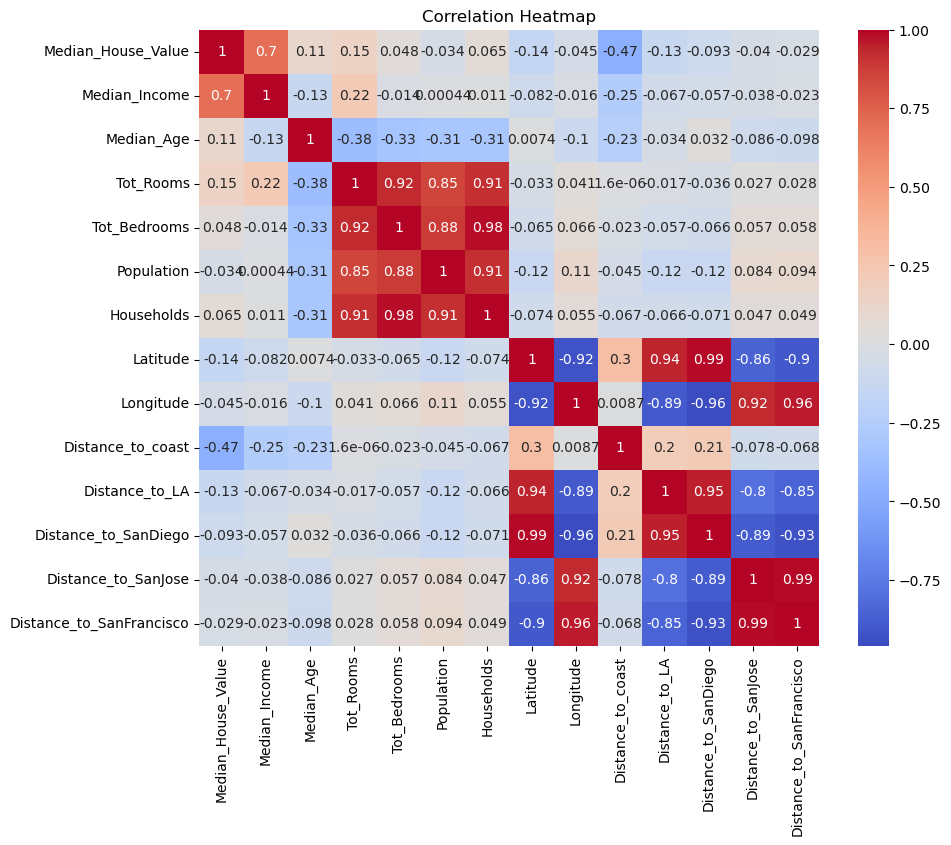

In [ ]:
# Calculate the correlation matrix
correlation_matrix = train_capped.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Key Insights from the Correlation Heatmap:

1. **Median_House_Value vs. Other Variables**:
   - The strongest correlation is between `Median_House_Value` and `Median_Income` (**0.70**), which makes intuitive sense since higher income is often associated with higher house prices.
   - The correlations between `Median_House_Value` and other variables like `Tot_Rooms` (**0.15**), `Tot_Bedrooms` (**0.048**), and `Population` (almost zero) are weak, indicating that house value is not heavily influenced by these features in this dataset.

2. **Multicollinearity Check**:
   - **Tot_Rooms**, **Tot_Bedrooms**, **Households**, and **Population** have **high correlations** with each other, particularly:
     - `Tot_Rooms` vs. `Tot_Bedrooms`: **0.92**
     - `Tot_Rooms` vs. `Households`: **0.91**
     - `Tot_Bedrooms` vs. `Households`: **0.98**
     - `Households` vs. `Population`: **0.91**
   - These high correlations suggest **potential multicollinearity** among these variables. Including all these variables in your regression model could cause issues because they are so strongly related, and they might not provide independent information.

3. **Geographical Features**:
   - There are strong correlations among geographical variables:
     - `Distance_to_SanFrancisco` vs `Distance_to_SanJose`, and `Distance_to_SanDiego` vs `Distance_to_LA` are all highly correlated with each other, with correlations above **0.9**.They presents the northern part and southern part of california respectively.
     - **Latitude** and **Longitude** are also highly correlated with these distance features. For example, the correlation between `Longitude` and `Distance_to_SanFrancisco` is **0.96**.
   - These geographical variables could also lead to multicollinearity if you include them all in the regression model. You might need to drop or combine some of these features.

4. **Key Variables for Regression**:
   - **Median_Income** appears to be the most relevant predictor for `Median_House_Value`, with a strong correlation of **0.70**.
   - You may want to retain `Median_Income` and explore using other low-correlation variables like `Distance_to_coast` (-0.47) as predictors, while handling the highly correlated variables appropriately.

### Conclusion:
- **Multicollinearity Detected**: The heatmap shows **high multicollinearity** among several variables, especially between `Tot_Rooms`, `Tot_Bedrooms`, `Households`, and `Population`. We should consider removing or combining these variables to avoid issues in your regression model.
- **Geographical Variables**: Similar multicollinearity exists between the geographical distance variables, which should be addressed by dropping or combining related features.
- **Strong Predictors**: `Median_Income` is the strongest predictor of `Median_House_Value`, making it an important feature for your model.

### So we can do:
1. **Combine Highly Correlated Variables**: get ratios of variables like `Tot_Bedrooms` or `Households` if they provide redundant information due to their high correlation with `Tot_Rooms`.We also considered other methods like PCA,however it will reduce the model's interpretability, which is very important in financial models. Therefore, we used ratios to reduce multicollinearity while keeping the model interpretable.
    We also tried `Tot_Bedrooms`/`Households` for its high correlation, however the new feature still highly related to the other two ratios so we dropped it.
2. **Handle Geographical Features**: We find the high correlation between two cities in pair(like SF vs Sanjose, LA vs Sandiego, indicate the southern and northern area of California. So we create two new feature: `Min_Distance_to_City` use the min value of this four to measure if it located near the urban area and `North_South_Direction` to understand if there is difference between northern and southern part.
    For Latitude and Longtitude, the georaphical data should be considered together so we use K-means to convert it into five clusters to indicate the region.
3. **Retain Key Predictors**: Keep features like `Median_Income` and explore others with moderate correlations to avoid redundant data.

## Feature Engineering


In [ ]:
# Create function for new ratio by combining 'Tot_Rooms', 'Tot_Bedrooms', 'Households' and 'Population'
def create_ratio_features(df):
    df = df.copy()  #
    # Caculate the ratio
    df['bedrooms_per_room'] = df['Tot_Bedrooms'] / df['Tot_Rooms']
    df['population_per_household'] = df['Population'] / df['Households']
    # Drop the individual distance columns to reduce multicollinearity
    df = df.drop(columns=['Tot_Bedrooms', 'Tot_Rooms', 'Population', 'Households'])
    return df

train_with_ratio = create_ratio_features(train_capped)
test_with_ratio = create_ratio_features(test_capped)


# Check the new dataframe structure
train_with_ratio.head()

,Median_House_Value,Median_Income,Median_Age,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,bedrooms_per_room,population_per_household
249,131900.0,2.0801,44,37.78,-122.22,5337.285928,547637.920206,726469.661022,57217.708686,18582.685334,0.306317,3.434343
2355,150800.0,6.0132,21,36.77,-119.68,183948.674667,329030.430401,506110.210387,206203.970982,267810.226424,0.144444,2.843902
11234,195200.0,4.7667,30,33.80,-117.96,14107.233838,38363.033912,141610.986188,530076.165957,598106.048167,0.179698,3.510791
14455,500000.0,3.7306,34,32.83,-117.28,2780.484868,162681.287109,16883.041492,653394.946261,721359.116892,0.272993,1.507270
19071,332300.0,5.7950,22,38.32,-122.53,22844.257133,610718.299401,789882.757165,122938.974488,61327.633136,0.154599,2.736527


In [ ]:
# Create function for new distance features
def create_distance_features(df):
    df = df.copy()

    # caculate min distance to city
    df['Min_Distance_to_City'] = df[['Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanFrancisco', 'Distance_to_SanJose']].min(axis=1)

    # caculate direction（north city - south city）
    df['North_South_Direction'] = (df[['Distance_to_SanFrancisco', 'Distance_to_SanJose']].mean(axis=1) -
                                   df[['Distance_to_LA', 'Distance_to_SanDiego']].mean(axis=1))

    # delete orgin columns
    df = df.drop(columns=['Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanFrancisco', 'Distance_to_SanJose'])

    return df

# apply to the dataset
train_with_distance = create_distance_features(train_with_ratio)
test_with_distance = create_distance_features(test_with_ratio)


# Check the new dataframe structure
train_with_distance.head()

,Median_House_Value,Median_Income,Median_Age,Latitude,Longitude,Distance_to_coast,bedrooms_per_room,population_per_household,Min_Distance_to_City,North_South_Direction
249,131900.0,2.0801,44,37.78,-122.22,5337.285928,0.306317,3.434343,18582.685334,-599153.593604
2355,150800.0,6.0132,21,36.77,-119.68,183948.674667,0.144444,2.843902,206203.970982,-180563.221691
11234,195200.0,4.7667,30,33.80,-117.96,14107.233838,0.179698,3.510791,38363.033912,474104.097011
14455,500000.0,3.7306,34,32.83,-117.28,2780.484868,0.272993,1.507270,16883.041492,597594.867276
19071,332300.0,5.7950,22,38.32,-122.53,22844.257133,0.154599,2.736527,61327.633136,-608167.224471


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


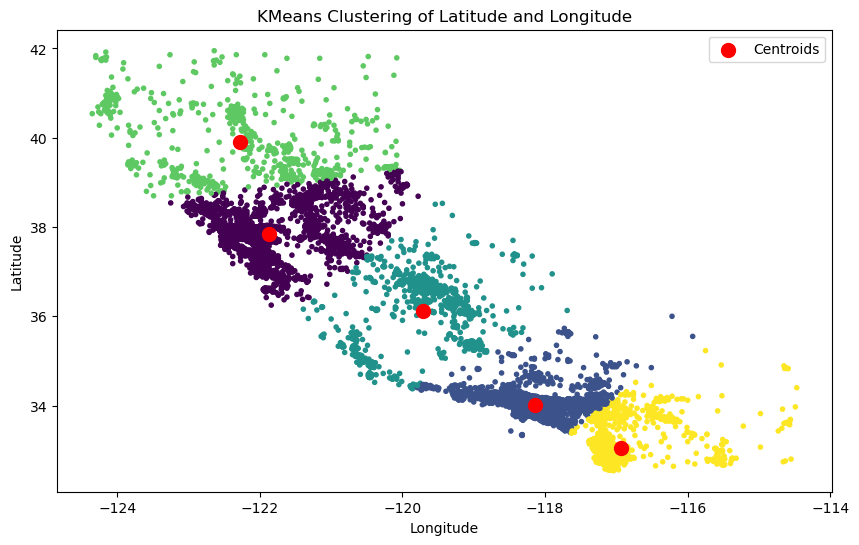

In [ ]:
from sklearn.cluster import KMeans

# Define a function to apply KMeans clustering and remove latitude/longitude
def apply_kmeans(train_df, test_df, n_clusters=5, random_state=42):
    # 1. Extract latitude and longitude features
    X_train = train_df[['Latitude', 'Longitude']]

    # 2. Initialize the KMeans model and fit it to the training data
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    train_df['Region'] = kmeans.fit_predict(X_train)

    # 3. Apply the same model to the test data
    X_test = test_df[['Latitude', 'Longitude']]
    test_df['Region'] = kmeans.predict(X_test)

    # 4. Visualize the clusters
    centroids = kmeans.cluster_centers_
    plt.figure(figsize=(10, 6))
    plt.scatter(train_df['Longitude'], train_df['Latitude'], c=train_df['Region'], cmap='viridis', marker='.')
    plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=100, label='Centroids')  # Plot cluster centers
    plt.title("KMeans Clustering of Latitude and Longitude")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.show()

    return train_df, test_df

# Apply the function to the training and test sets
train_kmeans, test_kmeans = apply_kmeans(train_with_distance, test_with_distance)


So far we have done all the feature transform and lets check the correlation again.

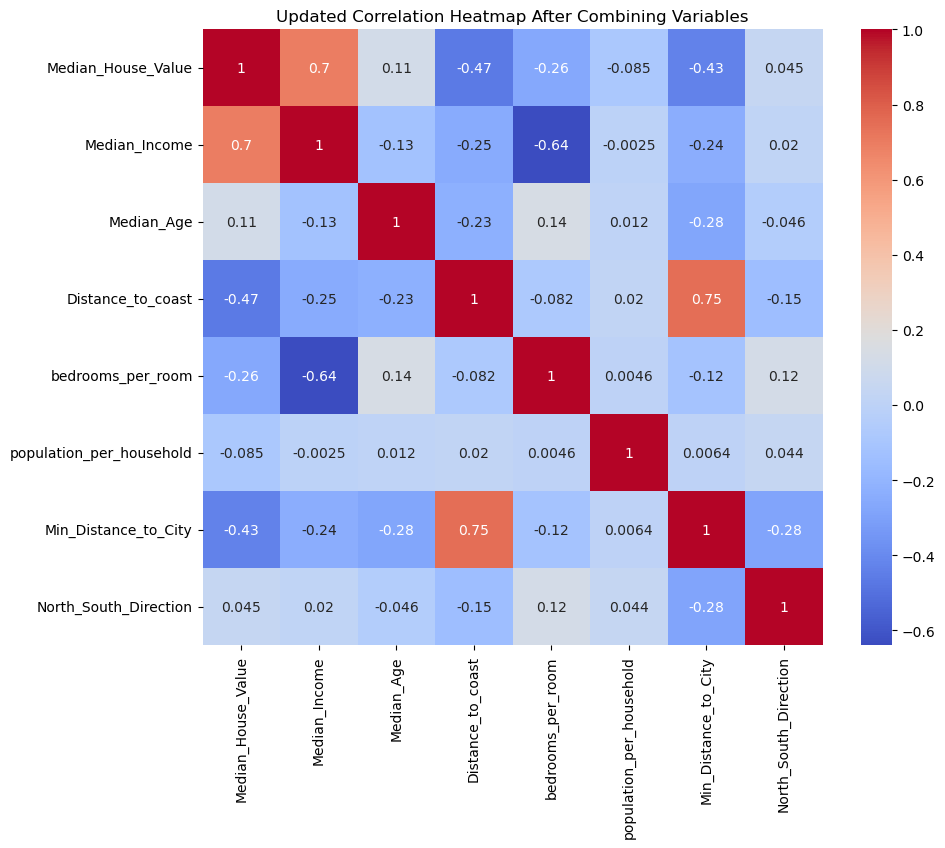

In [ ]:
#Take relevant variables
numeric_df = train_kmeans.loc[:, ['Median_House_Value', 'Median_Income', 'Median_Age',
       'Distance_to_coast', 'bedrooms_per_room', 'population_per_household',
       'Min_Distance_to_City', 'North_South_Direction']]
# Calculate the updated correlation matrix
correlation_matrix_final = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_final, annot=True, cmap='coolwarm')
plt.title("Updated Correlation Heatmap After Combining Variables")
plt.show()

## Model Benchmarking


After this I found distance to coast is highly related with min distance to city, but they seems have no causation, besides, the model we decided to use is Randomforest and XGBoost that can deal with the multicollinearity problems, so we still keep these two features.

Since the dataset contains features with different scales (for example, `Median_Income` is in a different range compared to `Distance` or `Direction`), it is a good idea to apply **normalization** or **standardization** to ensure that all features are on the same scale. This is particularly important if we plan to use models sensitive to feature scales, such as linear regression, k-nearest neighbors, or gradient-based models.

We chose min-max scaling to process the features in our dataset, typically scaling them to a range between 0 and 1. Because: 1.Some of our features have very different ranges. For example, population numbers might go up to 35,000, while median income might only range from 0 to 15. If we don’t adjust these differences, features with larger ranges could overshadow those with smaller ranges, skewing the results when we use algorithms like linear regression or distance-based methods. 2.Many machine learning algorithms, especially those that use gradient descent or depend on distances, work better when the features are on the same scale. Min-max scaling helps ensure that each feature has an equal impact on the model, instead of letting features with larger ranges take over.3.Unlike standardization, min-max scaling keeps the relationships between the original values intact. Since we’re predicting continuous values like house prices, it’s important to preserve these relationships so we don’t distort the input data.4.For models like linear regression, min-max scaling can speed up how quickly the model converges and improve accuracy during training by making sure all features contribute proportionally.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scale_minmax(train_df, test_df, columns_to_scale):
    # Create a MinMaxScaler
    scaler = MinMaxScaler()
    train_df[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])

    # scaling test set with fit function
    test_df[columns_to_scale] = scaler.transform(test_df[columns_to_scale])

    return train_df, test_df

columns_to_scale = ['Median_Income','Median_Age','Min_Distance_to_City','North_South_Direction','Distance_to_coast']

# Apply the function
train_final, test_final = scale_minmax(train_kmeans, test_kmeans, columns_to_scale)

train_final.describe()

,Median_House_Value,Median_Income,Median_Age,Latitude,Longitude,Distance_to_coast,bedrooms_per_room,population_per_household,Min_Distance_to_City,North_South_Direction,Region
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,206934.132510,0.291612,0.540552,35.634637,-119.571391,0.121347,0.212755,2.962199,0.141015,0.527138,1.168484
std,115212.340362,0.188452,0.246755,2.134671,2.003399,0.148111,0.055535,2.406398,0.155388,0.393453,1.235252
min,50211.000000,0.000000,0.000000,32.540000,-124.350000,0.000000,0.104712,0.970588,0.000000,0.000000,0.000000
25%,120000.000000,0.157273,0.333333,33.930000,-121.800000,0.026982,0.176127,2.438202,0.034228,0.063617,0.000000
50%,179550.000000,0.259018,0.549020,34.260000,-118.500000,0.060892,0.203390,2.817325,0.073003,0.796945,1.000000
75%,264700.000000,0.384637,0.705882,37.710000,-118.000000,0.149227,0.238624,3.269432,0.188616,0.870088,1.000000
max,500001.000000,1.000000,1.000000,41.950000,-114.470000,1.000000,0.780347,180.484375,1.000000,1.000000,4.000000


**Now we can work on regression**

The cluster is a categorical varible and two possible endcoding tpye (onehot or label) may be applied for different model. Models base on decision tree can identify the lable category so we do not need extra tranform for Random Forest and XGBoost, other models like Linear Regression and SVM may take the label as continuous, which could lead to incorrect assumptions about the relationships between categories. Therefore, we use one-hot encoding to convert these labels.

In [ ]:
#Import necessary libraries

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Pipeline with One-Hot encoding for LM as Benchmark

# define categorical column
categorical_features = ['Region']

# Preprocessor with One-Hot Encoding for categorical features
preprocessor_with_onehot = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Pipeline for Linear Regression
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_with_onehot),
    ('regressor', LinearRegression())
])

# Train and evaluate each model
for model_name, pipeline in {'Linear Regression': linear_pipeline}.items():
    # Train the model
    pipeline.fit(train_final.drop('Median_House_Value', axis=1), train_final['Median_House_Value'])
    y_pred = pipeline.predict(test_final.drop('Median_House_Value', axis=1))

    # Calculate MAE and RMSE
    mae = mean_absolute_error(test_final['Median_House_Value'], y_pred)
    rmse = np.sqrt(mean_squared_error(test_final['Median_House_Value'], y_pred))

    # Output evaluation results
    print(f"{model_name} model:")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  R² score: {pipeline.score(test_final.drop('Median_House_Value', axis=1), test_final['Median_House_Value'])}")


Linear Regression model:
  Mean Absolute Error (MAE): 50219.59903357881
  Root Mean Squared Error (RMSE): 69196.85336040301
  R² score: 0.6418995992988156


In [ ]:
#Tree-based pipeline using RF and XGBoost, Decision Tree is also used as benchmark

categorical_features = ['Region']

# Preprocessor without One-Hot Encoding
preprocessor_without_onehot = ColumnTransformer(
    transformers=[
        ('cat', 'passthrough', categorical_features)
    ],
    remainder='passthrough'
)

# Pipeline for Random Forest
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_without_onehot),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Pipeline for XGBoost
xgboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_without_onehot),
    ('regressor', XGBRegressor(random_state=42))
])

# Pipeline for Decision Tree
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_without_onehot),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train and evaluate each model
for model_name, pipeline in {'Random Forest': random_forest_pipeline, 'XGBoost': xgboost_pipeline,'Decision Tree': decision_tree_pipeline}.items():
    pipeline.fit(train_final.drop('Median_House_Value', axis=1), train_final['Median_House_Value'])
    y_pred = pipeline.predict(train_final.drop('Median_House_Value', axis=1))

    # Calculate MAE and RMSE
    mae = mean_absolute_error(train_final['Median_House_Value'], y_pred)
    rmse = np.sqrt(mean_squared_error(train_final['Median_House_Value'], y_pred))

    # Output evaluation results
    print(f"{model_name} model:")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  R² score: {pipeline.score(train_final.drop('Median_House_Value', axis=1), train_final['Median_House_Value'])}")


Random Forest model:
  Mean Absolute Error (MAE): 10975.876654554264
  Root Mean Squared Error (RMSE): 17355.392074129435
  R² score: 0.9773067256521782
XGBoost model:
  Mean Absolute Error (MAE): 18670.304144807564
  Root Mean Squared Error (RMSE): 26912.82756771997
  R² score: 0.9454308784286757
Decision Tree model:
  Mean Absolute Error (MAE): 0.0
  Root Mean Squared Error (RMSE): 0.0
  R² score: 1.0


Current results indicates random forest and XGBoost is the better model, but are they overfitted? We use K-Folders to check the results again before hyperparameter tuning.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# Define KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List of models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Function to compute scores
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'RMSE': make_scorer(rmse_scorer),
    'MAE': make_scorer(mean_absolute_error),
    'R²': make_scorer(r2_score)
}

# Dictionary to store results
results = {}

# Perform K-fold cross validation for each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Perform cross validation and get scores for each metric
    scores = {}
    for metric_name, scorer in scoring.items():
        score = cross_val_score(model, train_final.drop('Median_House_Value', axis=1),
                                train_final['Median_House_Value'], cv=kf,
                                scoring=scorer)
        scores[metric_name] = score

    # Calculate mean and std for each metric
    results[model_name] = {
        'Mean RMSE': np.mean(scores['RMSE']),
        'Mean MAE': np.mean(scores['MAE']),
        'Mean R²': np.mean(scores['R²'])
    }

# Output the results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean RMSE: {metrics['Mean RMSE']}")
    print(f"  Mean MAE: {metrics['Mean MAE']}")
    print(f"  Mean R²: {metrics['Mean R²']}")


Evaluating Linear Regression...
Evaluating Random Forest...
Evaluating XGBoost...
Linear Regression:
  Mean RMSE: 69702.22059951293
  Mean MAE: 50640.26906812876
  Mean R²: 0.6336150131421316
Random Forest:
  Mean RMSE: 47221.68815178213
  Mean MAE: 30166.91262064221
  Mean R²: 0.8318459198120882
XGBoost:
  Mean RMSE: 45319.014800665005
  Mean MAE: 29506.33474627592
  Mean R²: 0.8450708281287019


We can see the K-folders have similar results with previous ones, our risk of overfitting reduced, so we move to the next part.

In the initial regression results, both Random Forest (RF) and XGBoost is better than Linear Regression (LM) and Decision Tree (DT), which serve as benchmarks. RF achieves an MAE of 30.166, an RMSE of 47221, and an R² score of 0.81, indicating good predictive accuracy. XGBoost slightly outperforms RF, with an MAE of 29506, an RMSE of 45319, and an R² score of 0.83, suggesting a better fit to the data. In contrast, LM and DT show higher errors and lower R² values of 0.63 and 0.66, respectively, indicating they are less effective at capturing the data's complexity. Overall, RF and XGBoost show promise and can be further improved through hyperparameter tuning.

## Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from IPython.display import display
import numpy as np
import pandas as pd

# set model paremeters
models = {
    'Random Forest': (RandomForestRegressor(random_state=42), {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 15, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }),
    'XGBoost': (XGBRegressor(random_state=42), {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0]
    })
}

results_list = []
best_rf = None
best_xgb = None

# GridSearchCV to train models
for model_name, (model, param_grid) in models.items():
    print(f"Optimizing {model_name}...")
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, return_train_score=True, verbose=2)

    grid_search.fit(train_final.drop('Median_House_Value', axis=1), train_final['Median_House_Value'])

    best_model = grid_search.best_estimator_

    if model_name == 'Random Forest':
        best_rf = best_model
    elif model_name == 'XGBoost':
        best_xgb = best_model

    # Predict and find the final result on train set
    y_pred = best_model.predict(train_final.drop('Median_House_Value', axis=1))

    rmse = np.sqrt(mean_squared_error(train_final['Median_House_Value'], y_pred))
    mae = mean_absolute_error(train_final['Median_House_Value'], y_pred)
    r2 = r2_score(train_final['Median_House_Value'], y_pred)

    #store final cv results
    cv_results = grid_search.cv_results_

    total_fit_time = cv_results['mean_fit_time'][grid_search.best_index_] * 3
    total_score_time = cv_results['mean_score_time'][grid_search.best_index_] * 3

    results_df = pd.DataFrame({
        'Model Name': [model_name],
        'RMSE': [rmse],
        'MAE': [mae],
        'R²': [r2],
        'Total Fit Time (s)': [total_fit_time],
        'Total Score Time (s)': [total_score_time],
        'n_estimators': [cv_results['param_n_estimators'][grid_search.best_index_]],
        'max_depth': [cv_results['param_max_depth'][grid_search.best_index_]]
    })

    results_list.append(results_df)

final_results_df = pd.concat(results_list, ignore_index=True)

display(final_results_df)


Optimizing Random Forest...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Optimizing XGBoost...
Fitting 3 folds for each of 36 candidates, totalling 108 fits


,Model Name,RMSE,MAE,R²,Total Fit Time (s),Total Score Time (s),n_estimators,max_depth
0,Random Forest,17984.495372,11786.965800,0.975632,293.012831,2.15098,300,20
1,XGBoost,19248.199359,13648.118667,0.972087,5.300720,0.11362,300,7


After Hpyerparameter tuning we find the best model so far, and then let's test the final perfermance as of RMSE,MAE and R.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_test = test_final.drop('Median_House_Value', axis=1)
y_test = test_final['Median_House_Value']

# Split the training set features and target
X_train = train_final.drop('Median_House_Value', axis=1)
y_train = train_final['Median_House_Value']

# Use the best models to make predictions on both the training set and the test set
y_pred_rf_train = best_rf.predict(X_train)
y_pred_rf_test = best_rf.predict(X_test)

y_pred_xgb_train = best_xgb.predict(X_train)
y_pred_xgb_test = best_xgb.predict(X_test)

# Calculate RMSE, MAE, and R² for Random Forest on training and test sets
rmse_rf_train = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
mae_rf_train = mean_absolute_error(y_train, y_pred_rf_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)

rmse_rf_test = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
mae_rf_test = mean_absolute_error(y_test, y_pred_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)

# Calculate RMSE, MAE, and R² for XGBoost on training and test sets
rmse_xgb_train = np.sqrt(mean_squared_error(y_train, y_pred_xgb_train))
mae_xgb_train = mean_absolute_error(y_train, y_pred_xgb_train)
r2_xgb_train = r2_score(y_train, y_pred_xgb_train)

rmse_xgb_test = np.sqrt(mean_squared_error(y_test, y_pred_xgb_test))
mae_xgb_test = mean_absolute_error(y_test, y_pred_xgb_test)
r2_xgb_test = r2_score(y_test, y_pred_xgb_test)

# Output the performance of the Random Forest model on the training and test sets
print("Random Forest model scores:")
print(f"  Training set RMSE: {rmse_rf_train:.2f}, MAE: {mae_rf_train:.2f}, R²: {r2_rf_train:.4f}")
print(f"  Test set RMSE: {rmse_rf_test:.2f}, MAE: {mae_rf_test:.2f}, R²: {r2_rf_test:.4f}")

# Output the performance of the XGBoost model on the training and test sets
print("\nXGBoost model scores:")
print(f"  Training set RMSE: {rmse_xgb_train:.2f}, MAE: {mae_xgb_train:.2f}, R²: {r2_xgb_train:.4f}")
print(f"  Test set RMSE: {rmse_xgb_test:.2f}, MAE: {mae_xgb_test:.2f}, R²: {r2_xgb_test:.4f}")


Random Forest model scores:
  Training set RMSE: 17984.50, MAE: 11786.97, R²: 0.9756
  Test set RMSE: 47522.43, MAE: 29615.84, R²: 0.8311

XGBoost model scores:
  Training set RMSE: 19248.20, MAE: 13648.12, R²: 0.9721
  Test set RMSE: 44864.95, MAE: 27812.79, R²: 0.8495


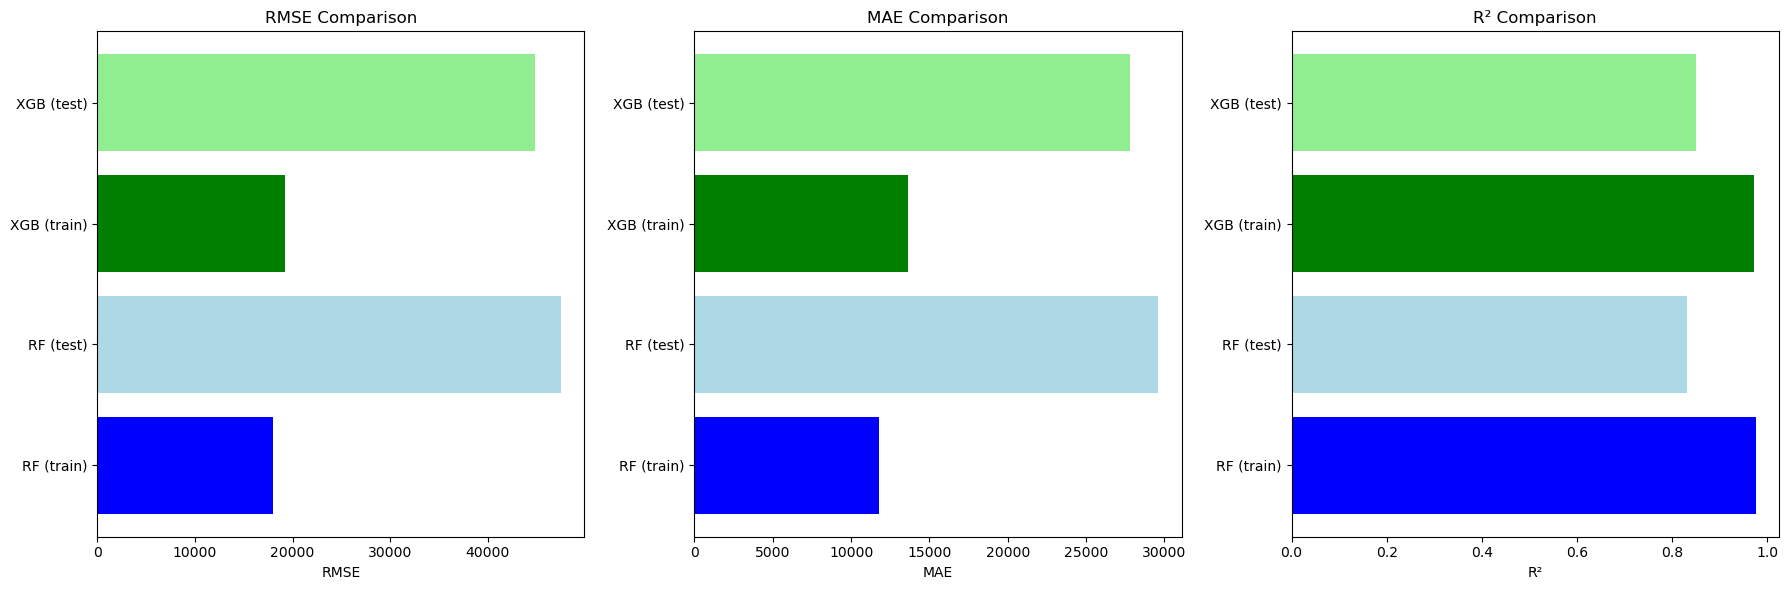

In [ ]:
# Data for visualization: RMSE, MAE, and R² for Random Forest and XGBoost
metrics = ['RMSE', 'MAE', 'R²']

# Random Forest scores
rf_train_scores = [rmse_rf_train, mae_rf_train, r2_rf_train]
rf_test_scores = [rmse_rf_test, mae_rf_test, r2_rf_test]

# XGBoost scores
xgb_train_scores = [rmse_xgb_train, mae_xgb_train, r2_xgb_train]
xgb_test_scores = [rmse_xgb_test, mae_xgb_test, r2_xgb_test]

# Set up the plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot each metric comparison between training and test sets for both models
for i, metric in enumerate(metrics):
    axes[i].barh(['RF (train)', 'RF (test)', 'XGB (train)', 'XGB (test)'],
                 [rf_train_scores[i], rf_test_scores[i], xgb_train_scores[i], xgb_test_scores[i]],
                 color=['blue', 'lightblue', 'green', 'lightgreen'])

    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_xlabel(metric)

# Show the plots
plt.tight_layout()
plt.show()


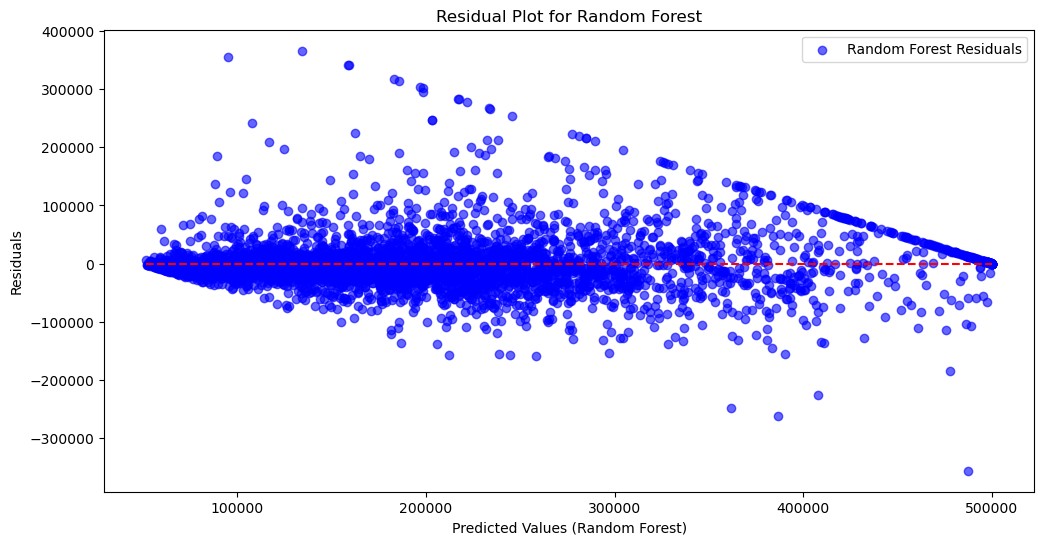

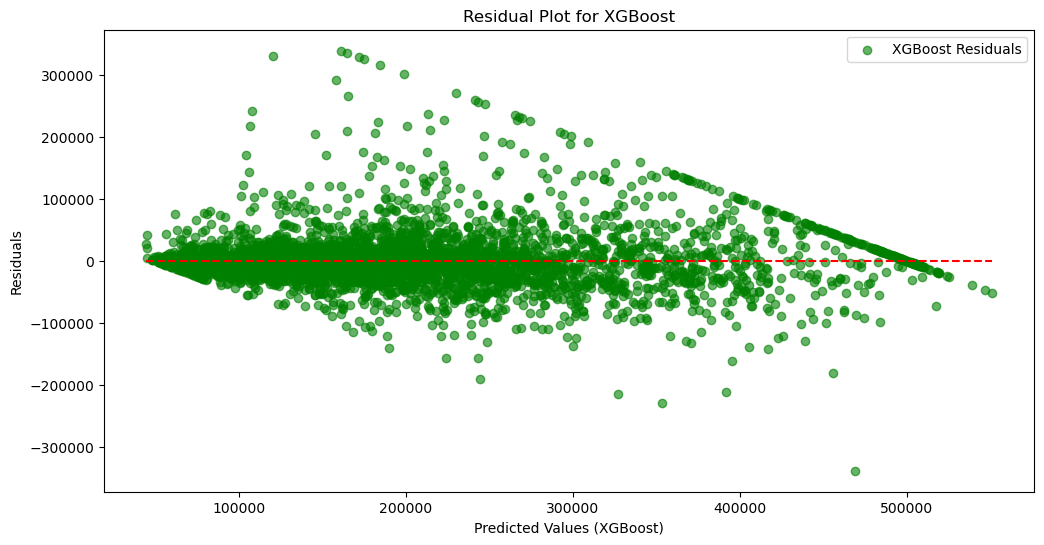

In [ ]:
# Draw residual plots
residuals_rf = y_test - y_pred_rf_test
residuals_xgb = y_test - y_pred_xgb_test

# RF PLOT
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_rf_test, residuals_rf, alpha=0.6, color='b', label='Random Forest Residuals')
plt.hlines(y=0, xmin=np.min(y_pred_rf_test), xmax=np.max(y_pred_rf_test), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values (Random Forest)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest')
plt.legend()
plt.show()

# XGB PLOT
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_xgb_test, residuals_xgb, alpha=0.6, color='g', label='XGBoost Residuals')
plt.hlines(y=0, xmin=np.min(y_pred_xgb_test), xmax=np.max(y_pred_xgb_test), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values (XGBoost)')
plt.ylabel('Residuals')
plt.title('Residual Plot for XGBoost')
plt.legend()
plt.show()


Both models demonstrate strong performance, but XGBoost perferms better than Random Forest. The XGBoost model has a lower RMSE (47,552 vs. 44,864) and higher R² (0.83 vs. 0.85) on the test set, indicating better generalization. Additionally, XGBoost's training time is significantly faster (293 seconds vs. 5 seconds), suggesting it is more efficient for large datasets.

The residual plots reveal a noticeable pattern in Random Forest, indicating potential underfitting or systematic error, whereas XGBoost shows a more uniform residual distribution, suggesting better handling of complex relationships. Both models exhibit overfitting to some degree, as indicated by the discrepancy between training and test scores, but XGBoost’s higher training R² (0.9708 vs. 0.9593) suggests it may have a higher variance.

To improve the models, consider hyperparameter tuning, feature selection, or advanced regularization techniques like Lasso as some of the features have high correlation. Ultimately, XGBoost is recommended due to its better trade-off between performance and computational efficiency.

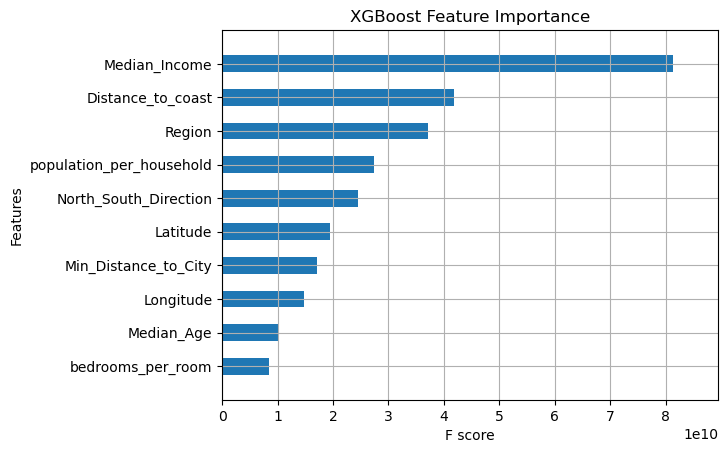

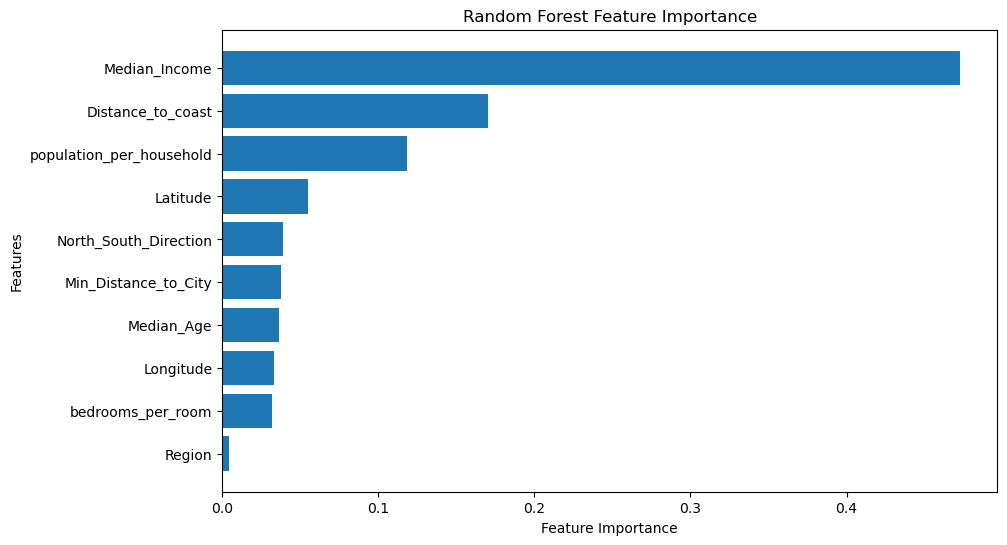

In [ ]:
import xgboost as xgb
# Plot the feature importances by XGB and RF
xgb.plot_importance(best_xgb, importance_type='gain', max_num_features=10, height=0.5, show_values=False)
plt.title('XGBoost Feature Importance')
plt.show()

# See feature importance by random forest
rf_importances = best_rf.feature_importances_
feature_names = train_final.drop('Median_House_Value', axis=1).columns
rf_feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
rf_feature_importances = rf_feature_importances.sort_values(by='Importance', ascending=False)

# Visualize the result
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importances['Feature'], rf_feature_importances['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.show()


From the both Feature importance plot, we can find the median income is the most important feature for predicting house values, with aligned with our daily life experience. From the feature importance, we can find the secret of high-valued house and we use Kmeans to cluster the house into five regions, with can help us understand the housing value better, this is the main contribution of this model.